In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install quandl
import quandl
import scipy.optimize as sco
import yfinance as yf
from scipy.optimize import minimize

np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Assignment Question #1-3


In [5]:
spx=yf.download('^GSPC', start='1984-01-01',end='2022-12-31', interval='3mo' )
gdp=quandl.get('FRED/GDP',start_date='1984-01-01',end_date='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [7]:
data=spx.join(gdp).dropna()

In [8]:
data.drop(columns=['Open','High','Low','Close','Volume'], inplace=True)

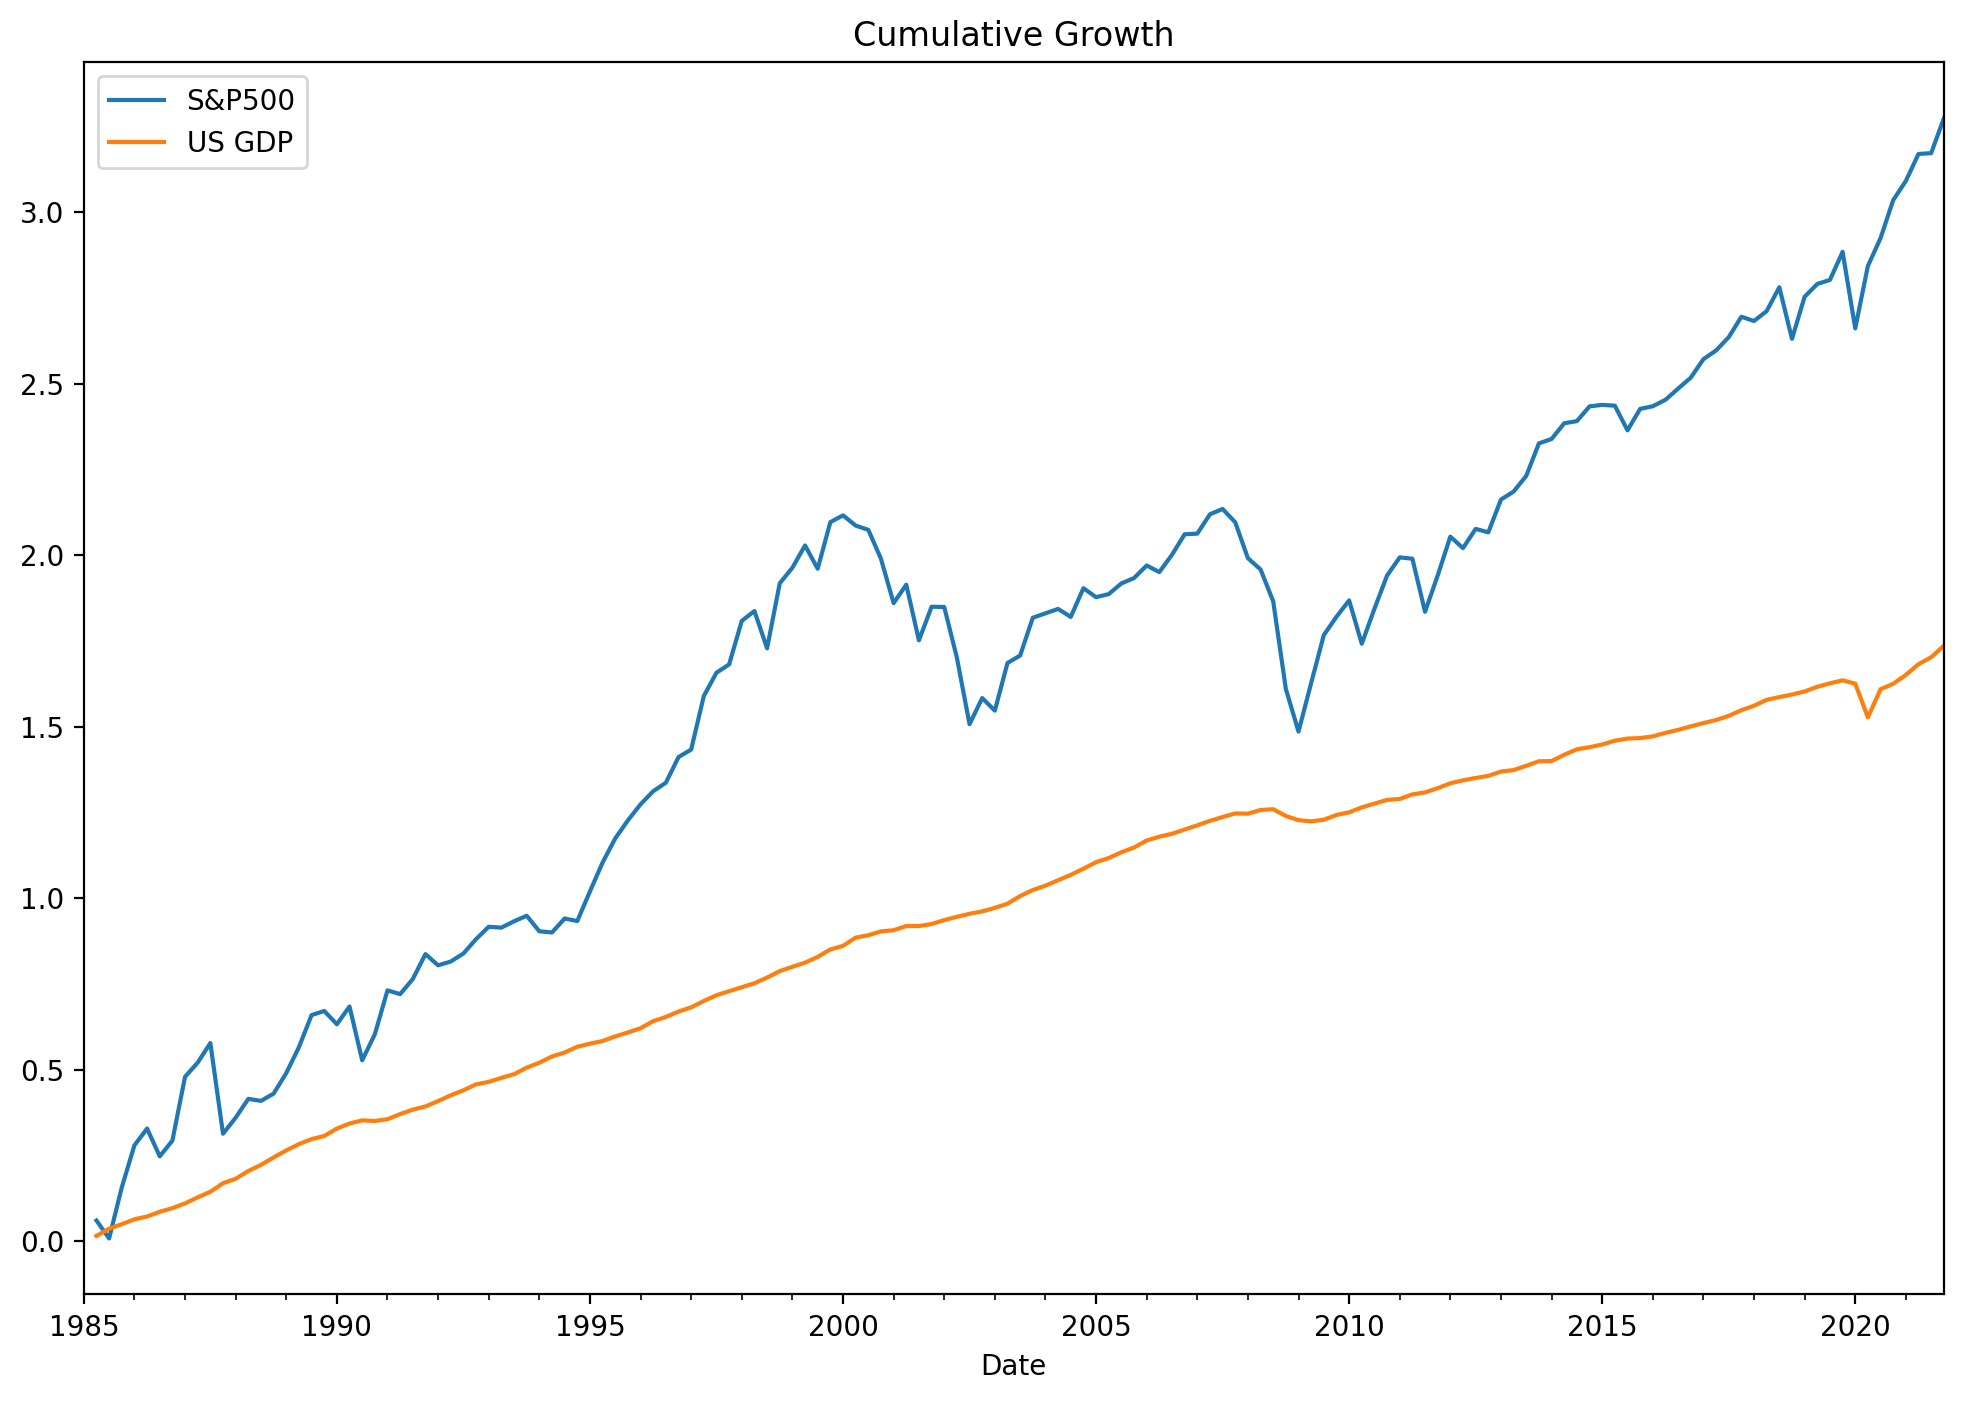

In [9]:
data.rename(columns={'Adj Close':'S&P500', 'Value':'US GDP'}, inplace=True)
growth=np.log(data/data.shift(1)).cumsum().plot(figsize=(12,8))
plt.title('Cumulative Growth')
plt.savefig('SP500+gdp.jpg')
plt.show()

## Assignment Question #1

a.	Explain what the lines represent.

b.	There are two big drops on SP 500. Briefly explain the causes for those drops. What about the third smaller one?

c.	From the graph, one can see that S&P 500 growth rate and US GDP growth rate started to diverge since the 1990s. From economic policy perspective, briefly discuss what might have caused the divergence. What do you think about the consequence of this divergence? 




## Assignement Question #2

List the S&P 500 companies that have the top 5 highest trailingPE, and the top 5 with highest forwardPE. Pick one of the companies in each case and explain if there was anything unusual about the company in the past year. Repeat the exercise for the 5 lowest ratios. 

In [11]:
# yf.Ticker('IBM').info

In [12]:
yf.Ticker('IBM').info['trailingPE']

55.07143

In [15]:
components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table

In [16]:
##Warning:  This takes a LONG time to run

SP500_PE=[]


for symbol in sp_df['Symbol']:
    try:
    #if symbol not in ['INFO', 'AES']:
        sym=symbol.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(sym)
        print(symbol,round(ticker_yahoo.info['forwardPE'],2))
        SP500_PE.append(
            {
                "Ticker":sym,
                "trainlingPE":ticker_yahoo.info['trailingPE'], 
                "forwardPE": ticker_yahoo.info['forwardPE'],
                "MarketCap": ticker_yahoo.info['marketCap']
            }
        )
    except:
        pass
    
SP500_PE=pd.DataFrame(SP500_PE)
    
    #    print(symbol,round(ticker_yahoo.info['forwardPE'],2))

MMM 10.47
AOS 18.43
ABT 23.77
ABBV 13.3
ACN 22.06
ATVI 18.26
ADM 11.51
ADBE 19.64
ADP 23.98
AAP 10.7
AES 11.39
AFL 10.85
A 20.35
APD 22.22
AKAM 13.7
ALK 6.1
ALB 9.47
ARE 31.96
ALGN 29.85
ALLE 15.36
LNT 17.53
ALL 9.01
GOOGL 18.58
GOOG 18.8
MO 8.68
AMZN 43.78
AMCR 14.0
AMD 23.87
AEE 18.14
AAL 4.53
AEP 16.03
AXP 12.01
AIG 6.81
AMT 40.47
AWK 28.88
AMP 8.97
ABC 13.61
AME 22.34
AMGN 12.4
APH 23.6
ADI 16.85
ANSS 30.92
AON 20.7
APA 5.33
AAPL 26.31
AMAT 17.84
APTV 15.14
ACGL 11.0
ANET 20.53
AJG 22.0
AIZ 9.52
T 6.81
ATO 18.34
ADSK 23.58
AZO 18.47
AVB 35.66
AVY 16.65
AXON 54.84
BKR 13.95
BALL 16.16
BAC 8.25
BBWI 9.61
BAX 12.86
BDX 18.41
WRB 10.54
BRK.B 18.08
BBY 10.33
BIO 23.83
TECH 33.5
BIIB 19.12
BLK 16.07
BK 7.84
BA 38.55
BKNG 16.1
BWA 7.51
BXP 23.27
BSX 24.18
BMY 8.36
AVGO 14.58
BR 20.54
BRO 23.69
BF.B 31.35
BG 8.13
CHRW 21.42
CDNS 35.49
CZR 20.11
CPT 61.49
CPB 16.93
COF 6.31
CAH 13.15
KMX 20.84
CCL 13.22
CARR 15.34
CTLT 13.28
CAT 11.63
CBOE 18.36
CBRE 12.81
CDW 16.45
CE 7.44
CNC 10.03
CNP 18

In [17]:
SP500_PE

,Ticker,trainlingPE,forwardPE,MarketCap
0,MMM,10.381198,10.467708,55785816064
1,AOS,42.893078,18.432432,10562270208
2,ABT,33.386017,23.774890,191351160832
3,ABBV,34.491764,13.302177,258627272704
4,ACN,25.5299,22.059620,175256453120
...,...,...,...,...
456,YUM,32.26698,23.313028,38590386176
457,ZBRA,34.265823,14.849151,14215648256
458,ZBH,64.23474,17.210064,28704563200
459,ZION,4.158975,4.742690,3815333376


In [ ]:
SP500_PE.to_csv('sp500company_pe_2022.csv')

In [18]:
SP500_PE['trainlingPE'] = pd.to_numeric(SP500_PE['trainlingPE'], errors='coerce')
SP500_PE_sorted_tr = SP500_PE.sort_values('trainlingPE', ascending=False)
SP500_PE_sorted_tr[['Ticker','trainlingPE']].head(6)

,Ticker,trainlingPE
236,PODD,inf
100,CINF,5200.50000
380,CRM,1016.65000
25,AMD,512.63160
185,FSLR,434.49020
448,WELL,308.19232


In [19]:
SP500_PE['forwardPE'] = pd.to_numeric(SP500_PE['forwardPE'], errors='coerce')
SP500_PE_sorted_fo = SP500_PE.sort_values('forwardPE', ascending=False)
SP500_PE_sorted_fo[['Ticker','forwardPE']].head(6)

,Ticker,forwardPE
236,PODD,152.03319
138,DISH,109.50001
296,MU,102.60317
134,DXCM,79.74000
448,WELL,69.67826
166,EQIX,68.73352


Company: CINF (Cincinnati Financial Corp.)

Ticker: CINF

Trainling PE: 5189.00000

Cincinnati Financial Corp. (CINF) has a trailing PE ratio of 5189.00000. A high PE ratio typically indicates that investors are willing to pay a premium for the company's earnings. In this case, the extremely high PE ratio for CINF suggests that its stock price is significantly higher relative to its earnings. However, it's important to note that a single metric, such as the PE ratio, may not provide a complete understanding of a company's financial situation.

To determine if anything unusual has occurred with CINF in the past year, it would be helpful to conduct a more thorough analysis, including reviewing the company's financial reports, news releases, and market developments. This information can provide insights into factors that may have contributed to the high trailing PE ratio and whether it is indicative of any unusual events or circumstances affecting the company.

Please keep in mind that this analysis is based solely on the available data and general understanding of PE ratios. For a comprehensive evaluation of a company's performance and any unusual occurrences, it is recommended to consult authoritative sources and conduct in-depth research.



Company: MU (Micron Technology Inc.)

Ticker: MU

Forward PE: 97.74603

Micron Technology Inc. (MU) has a forward PE ratio of 97.74603. The forward PE ratio is calculated based on estimated future earnings. A high forward PE ratio suggests that the market has high expectations for the company's future earnings growth.

To determine if there is anything unusual about MU in the past year, we need to consider various factors, such as the company's financial performance, industry trends, and recent news or events. Some points to consider for MU could include:

Market Conditions: Micron Technology operates in the semiconductor industry, which has experienced significant demand and supply dynamics. Changes in demand for memory chips, shifts in technology, or geopolitical factors could have influenced the company's performance. Financial Performance: Analyzing Micron Technology's financial statements, including revenue, profitability, and earnings growth, can provide insights into the company's recent performance. Comparing the forward PE ratio with historical values or industry benchmarks can help identify any significant deviations. Industry Developments: Understanding the broader semiconductor industry landscape, such as advancements in technology, competition, or regulatory changes, can provide context for assessing MU's performance relative to its peers. It's important to note that this analysis is based on the available data and general knowledge of PE ratios and industry trends. To obtain a comprehensive understanding of any unusual occurrences or factors affecting MU, further research and analysis, including reviewing the company's financial reports and staying updated with relevant news, would be necessary.

In [20]:
SP500_PE_sorted_tr[['Ticker','trainlingPE']].tail(6)

,Ticker,trainlingPE
112,CMA,3.614331
345,PSX,3.598931
278,MPC,3.395641
432,VLO,3.214977
164,EQT,3.047702
138,DISH,2.027778


In [21]:
SP500_PE_sorted_fo[['Ticker','forwardPE']].tail(6)

,Ticker,forwardPE
331,OGN,4.560175
27,AAL,4.533333
112,CMA,4.408740
427,UAL,4.248120
438,VTRS,3.253472
299,MRNA,-31.387949


Company: DISH Network Corporation

Ticker: DISH

Trailing PE: 2.030449

DISH Network Corporation (DISH) has a trailing PE ratio of 2.030449. A low PE ratio typically suggests that the market is valuing the company's earnings relatively lower compared to its stock price. It indicates that investors are willing to pay less for each unit of earnings generated by the company.

To understand why the trailing PE ratio for DISH is lower, we need to consider several factors:

Industry Dynamics: DISH operates in the telecommunications and media industry. It is possible that the company is facing challenges or undergoing changes within its industry that are impacting its earnings and, subsequently, its PE ratio. Competitive pressures, technological advancements, or shifts in consumer behavior could contribute to the lower PE ratio.

Financial Performance: Analyzing DISH's financial statements, such as revenue, profitability, and earnings growth, can provide insights into the company's recent performance. If the company has experienced a decline in earnings or faces challenges in generating consistent profits, it could contribute to a lower PE ratio.

Market Sentiment: The market's perception of DISH's prospects and future growth potential can influence its PE ratio. If investors have concerns or uncertainties about the company's future earnings or strategic direction, it could result in a lower valuation.

It's important to note that this analysis is based on the available data and general knowledge of PE ratios and industry trends. To obtain a comprehensive understanding of any unusual occurrences or factors impacting DISH, further research and analysis, including reviewing the company's financial reports and staying updated with relevant news and industry developments, would be necessary.

Company: Moderna Inc.

Ticker: MRNA

Forward PE: -31.189188

Moderna Inc. (MRNA) has a forward PE ratio of -31.189188. A negative PE ratio indicates that the company is expected to report negative earnings in the future, based on the estimated forward earnings. This situation can occur when a company is in a growth phase and reinvesting heavily in research and development or experiencing losses in the short term.

To understand why Moderna's forward PE ratio is negative, we need to consider several factors:

Biotechnology Industry: Moderna operates in the biotechnology sector, particularly focused on mRNA-based drug development, including vaccines. The industry is known for high research and development costs, which can impact earnings and contribute to negative PE ratios in the short term.

Vaccine Development: Moderna gained significant attention for its COVID-19 vaccine development. The negative forward PE ratio may be influenced by the company's substantial investment in research and development, ongoing clinical trials, and uncertainties related to the commercial success and profitability of their vaccines beyond the pandemic period.

Market Expectations: The negative forward PE ratio could reflect the market's perception that Moderna's future earnings may not meet expectations or that there is uncertainty regarding the company's future profitability. Factors such as competition, regulatory challenges, or the ability to maintain a sustainable pipeline of successful products could influence market sentiment.

It's crucial to note that this analysis is based on the available data and general understanding of PE ratios and the biotechnology industry. To gain a comprehensive understanding of any unusual occurrences or factors impacting Moderna, further research, including reviewing the company's financial reports, clinical trial results, and staying updated with relevant news and developments in the industry, is recommended.

Company: American Airlines Group Inc.

Ticker: AAL

Forward PE: 4.493650

American Airlines Group Inc. (AAL) has a forward PE ratio of 4.493650. A low forward PE ratio suggests that the market is valuing the company's future earnings relatively lower compared to its stock price. It indicates that investors are willing to pay less for each unit of expected earnings generated by the company.

To understand if there is anything unusual about American Airlines in the context of its forward PE ratio, we need to consider several factors:

Airline Industry Dynamics: The airline industry has faced significant challenges, especially due to the COVID-19 pandemic. Airlines experienced a severe downturn in demand, travel restrictions, and increased costs. These factors can impact earnings and subsequently influence the PE ratio. It is important to consider the industry's recovery prospects and the potential impact on American Airlines' future earnings.

Financial Performance: Analyzing American Airlines' financial reports, such as revenue, profitability, and cost management, can provide insights into the company's recent performance. Factors such as operating efficiency, pricing power, and market share can influence the company's ability to generate earnings and impact the PE ratio.

Market Sentiment: The market's perception of American Airlines' future growth potential, competitive position, and recovery outlook can influence its forward PE ratio. Factors such as changes in travel demand, competitive dynamics within the industry, and investor sentiment towards the airline sector can affect the company's valuation.

It's important to note that this analysis is based on the available data and general knowledge of PE ratios and the airline industry. To gain a comprehensive understanding of any unusual occurrences or factors impacting American Airlines, further research, including reviewing the company's financial reports, staying updated with relevant news, and monitoring the industry's recovery progress, would be necessary.

# Assignment Question #3
Suppose that you want to establish a portfolio among only those S&P 500 companies with the following features:

1.   Market cap between the 40-60% quantile
2.   Forward PE among the 30-50% quantile.
	
List those companies.


In [22]:
# Calculate the quantiles for market cap and forward PE
market_cap_quantile_40 = SP500_PE['MarketCap'].quantile(0.4)
market_cap_quantile_60 = SP500_PE['MarketCap'].quantile(0.6)

forward_pe_quantile_30 = SP500_PE['forwardPE'].quantile(0.3)
forward_pe_quantile_50 = SP500_PE['forwardPE'].quantile(0.5)

# Filter the DataFrame based on the given quantile ranges
filtered_portfolio = SP500_PE[
    (SP500_PE['MarketCap'] >= market_cap_quantile_40) & (SP500_PE['MarketCap'] <= market_cap_quantile_60) &
    (SP500_PE['forwardPE'] >= forward_pe_quantile_30) & (SP500_PE['forwardPE'] <= forward_pe_quantile_50)
]

# Display the list of companies in the filtered portfolio
portfolio_companies = filtered_portfolio[['Ticker', 'MarketCap', 'forwardPE']]
print(portfolio_companies)

    Ticker    MarketCap  forwardPE
34     ABC  35059400704  13.605966
44    APTV  25740216320  15.135179
82    CARR  36312600576  15.344087
109   CTSH  32314181632  13.410256
118    GLW  26780831744  12.946058
148     DD  30295443456  13.283402
154    EIX  27858198528  14.164705
156     EA  34234621952  16.318954
172     ES  26805016576  16.489270
244    IQV  35527065600  15.995823
253      K  24034193408  16.269142
259    KMI  37541937152  14.033613
263    LHX  35833442304  14.124717
328     ON  35582017536  15.400001
387    SPG  40092119040  14.769338
402   TROW  23991033856  15.227794
406    TEL  38457122816  16.254667
439   VICI  32605954048  12.677291
452    WTW  24448387072  13.490898


# Assignment Question #4

Use the same companies we picked in the Session - 2 Frontier Analysis example, and the same time period (2017-2022). Assume risk free rate was 2.78% (constant for this question).

a.	One the first business day of January, 2022, use the data from 2017-2021 to find the portfolio that has the highest Sharpe ratio (tangent portfolio).  You can use the monthly returns.

b.	Use the data from 2022, compute the mean and standard deviation of the monthly returns for the equally weighted portfolio (rebalanced at the beginning of each month).

c.	Compute the mean and standard deviation for the monthly returns of the tangent portfolio.

d.	Compare the results.

**Note: Make sure the returns are all consistent, i.e., convert them all to daily, monthly, or annual returns.  Make up assumptions as needed.**

## Initial setup

In [2]:

# Define the stock symbols
stocks = ['AAPL', 'AMZN', 'GOOGL', 'BAC', 'MCD', 'CAT', 'TSLA', 'PFE']

# Create an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through each stock symbol and retrieve the data
for stock in stocks:
    # Retrieve the daily stock data for the year 2022
    stock_data = yf.download(stock, start='2017-01-01', end='2022-12-31')
       
    # Add a column for the stock symbol
    stock_data.loc[:, 'ticker'] = stock
    
    # Append the stock data to the main DataFrame
    data = pd.concat([data, stock_data], axis=0)

# Reset the index of the DataFrame
data.reset_index(inplace=True)

# Select the desired columns
data = data[['Date', 'ticker', 'Adj Close']]

# Rename the columns to match the original code
data.columns = ['date', 'ticker', 'adj_close']

# Print the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        date ticker  adj_close
0 2017-01-03   AAPL  27.095852
1 2017-01-04   AAPL  27.065517
2 2017-01-05   AAPL  27.203163
3 2017-01-06   AAPL  27.506426
4 2017-01-09   AAPL  27.758371


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       12080 non-null  datetime64[ns]
 1   ticker     12080 non-null  object        
 2   adj_close  12080 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 283.2+ KB


In [4]:
# Check if all the companies and time period are correctly selected  
print('The companies are:', data.ticker.unique(), 'and there is', len(data),'date entry points')
print('The date range of stock data is from', data.date.min(), ' to ',data.date.max())

The companies are: ['AAPL' 'AMZN' 'GOOGL' 'BAC' 'MCD' 'CAT' 'TSLA' 'PFE'] and there is 12080 date entry points
The date range of stock data is from 2017-01-03 00:00:00  to  2022-12-30 00:00:00


In [5]:
# keep this 'data' as original and use df. We drop the level(0), which is the adj_closed written on th first line, no need for it
df = data.set_index('date')
table = df.pivot(columns='ticker')
table.columns = table.columns.droplevel(0)
table.head()

ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
date,,,,,,,,
2017-01-03,27.095852,37.683498,19.755688,79.812820,40.400501,103.010788,24.618330,14.466000
2017-01-04,27.065517,37.859001,20.123970,79.456200,40.388500,102.890213,24.834671,15.132667
2017-01-05,27.203163,39.022499,19.887215,78.972160,40.651001,103.079659,25.073399,15.116667
2017-01-06,27.506426,39.799500,19.887215,79.006119,41.260502,103.992493,24.976414,15.267333
2017-01-09,27.758371,39.846001,19.773220,78.437180,41.359001,103.708313,24.968958,15.418667


Text(0, 0.5, 'price in $')

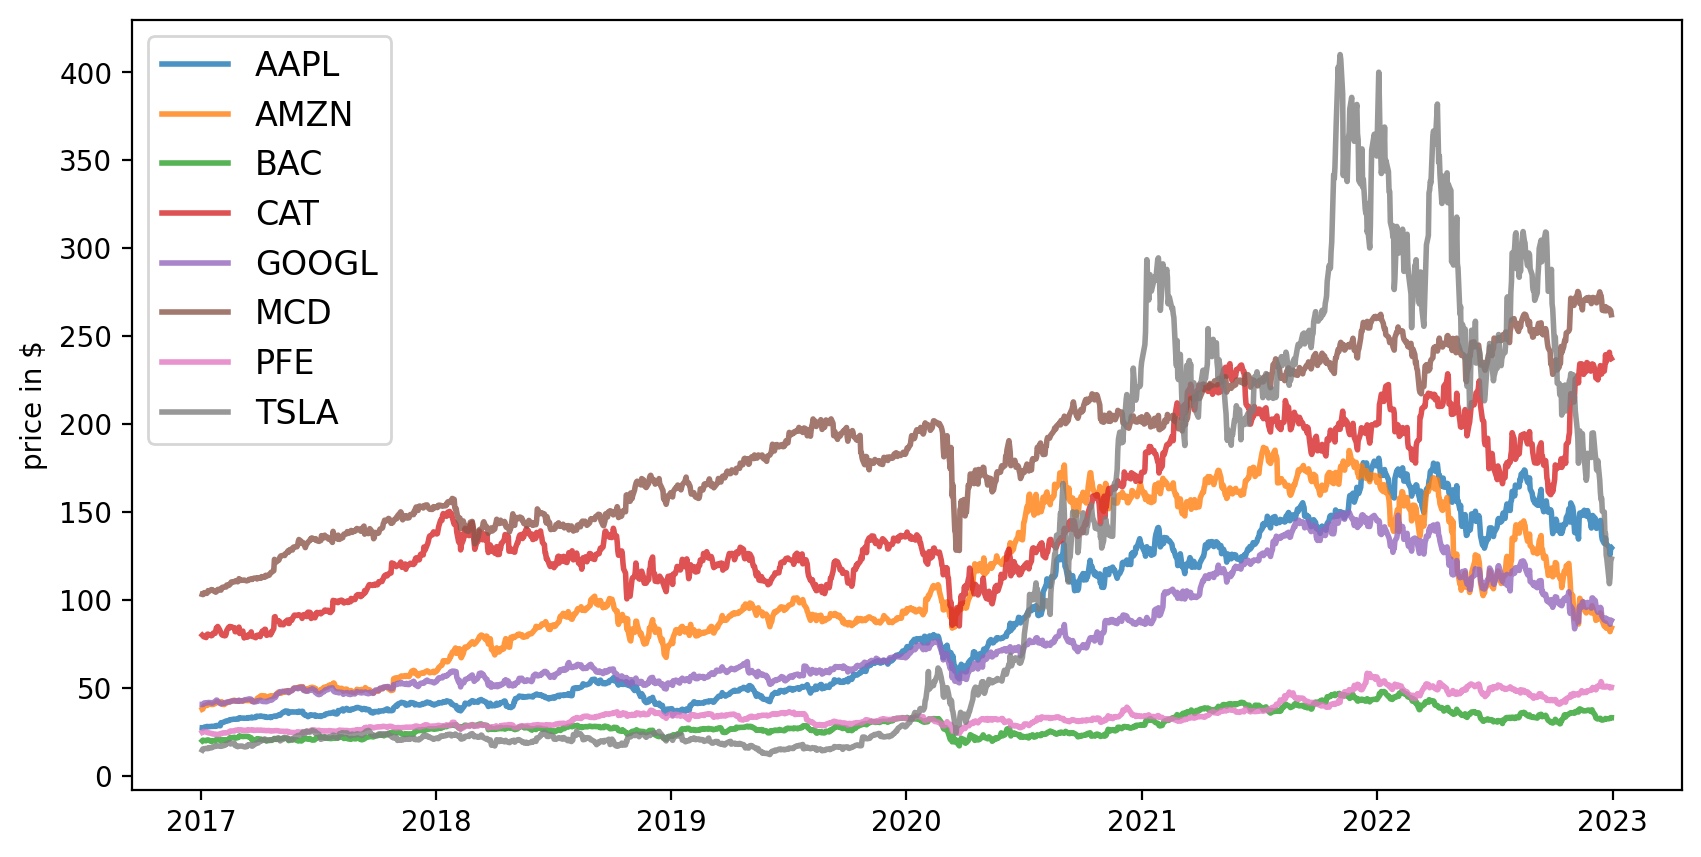

In [6]:
plt.figure(figsize=(10, 5))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=2, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

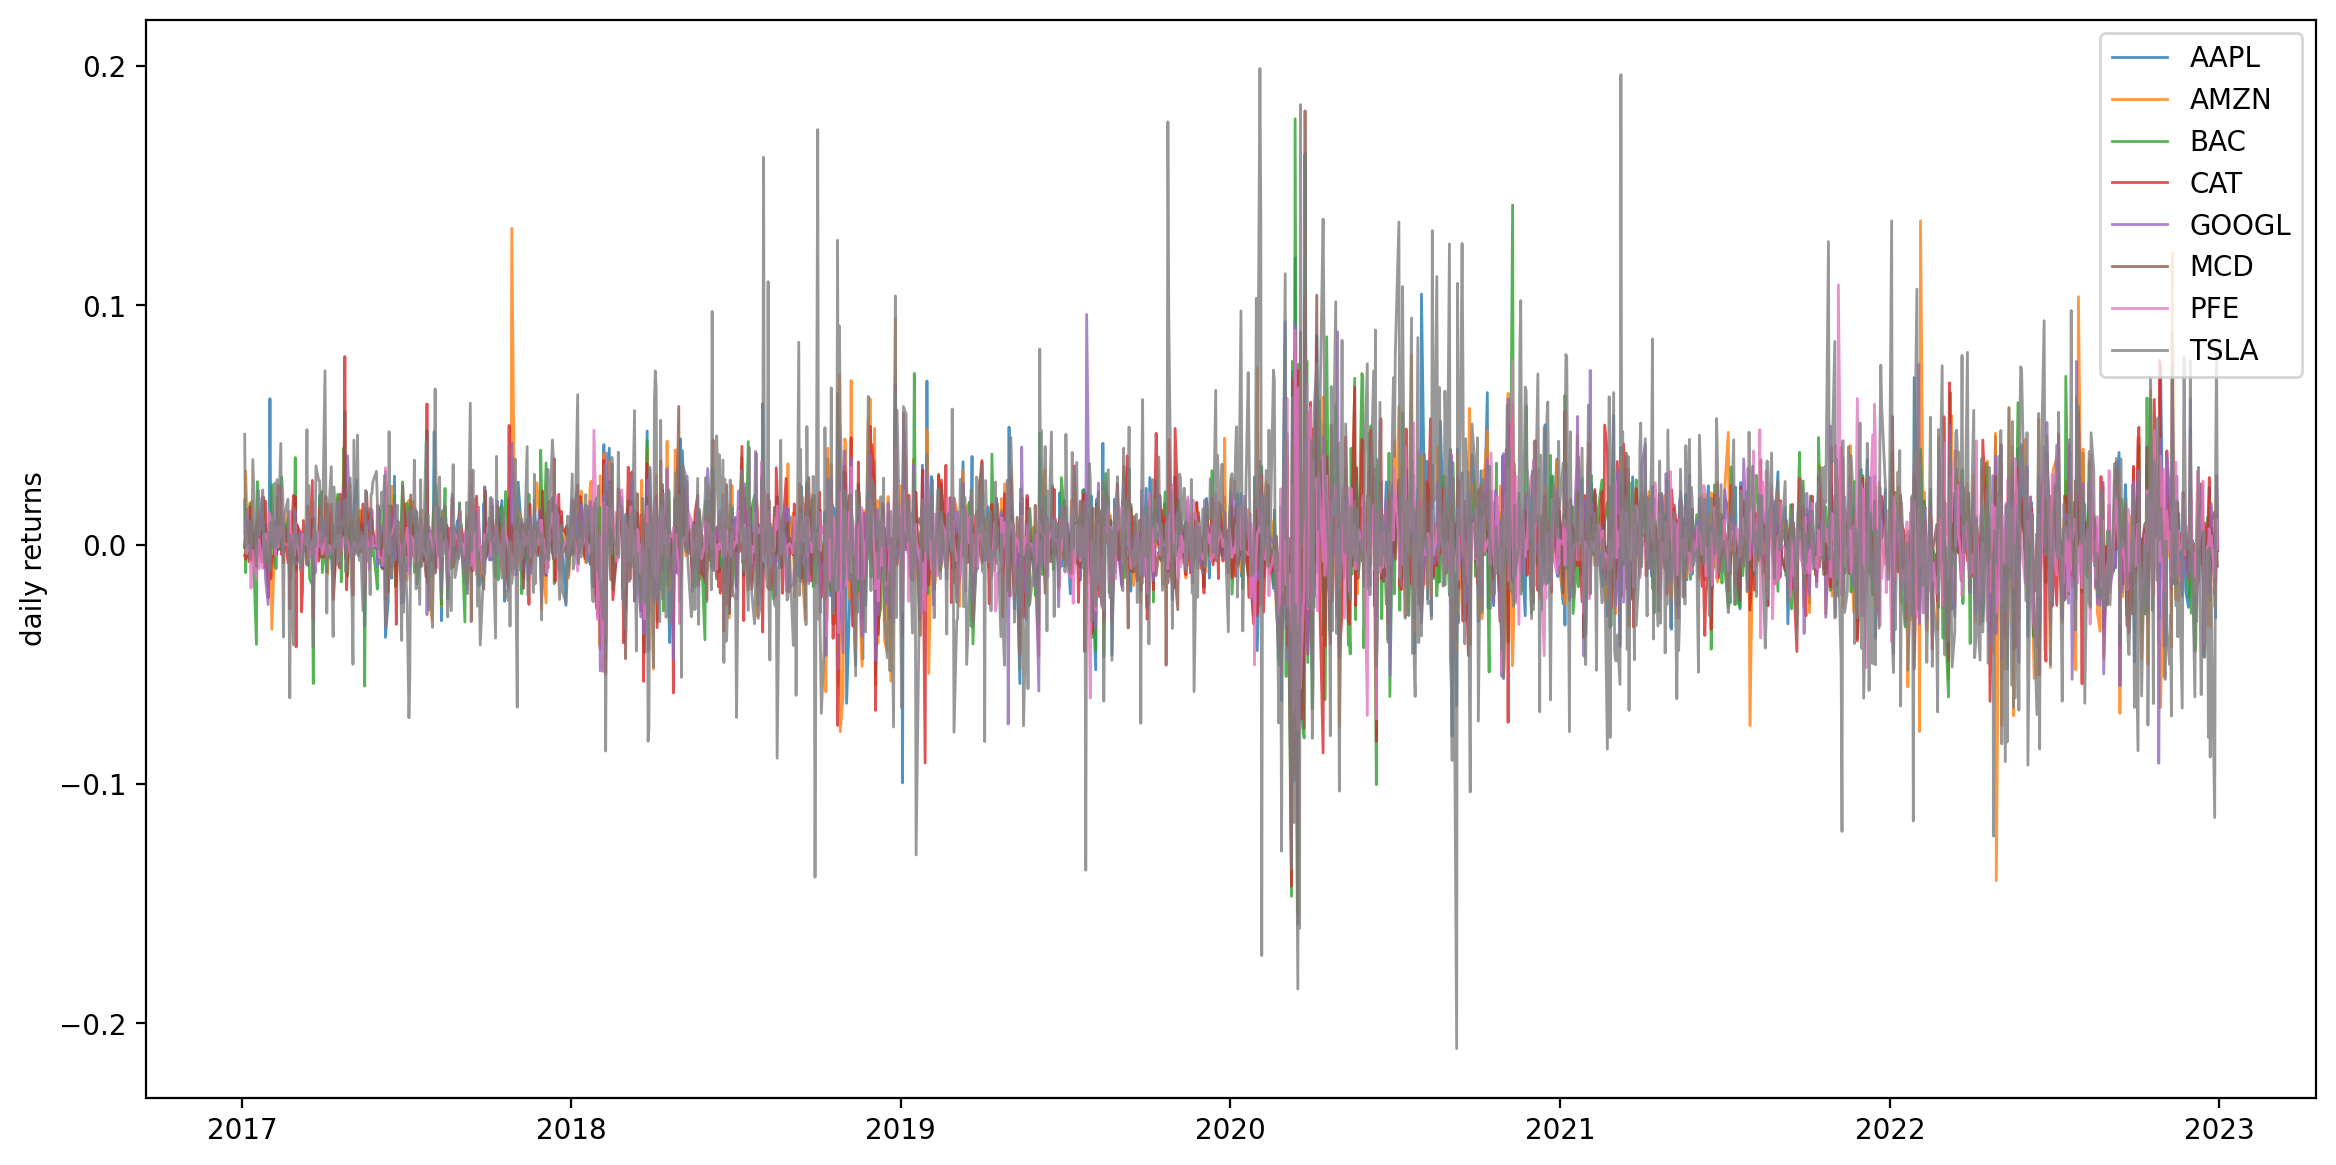

In [7]:
# Calculate the daily percentage returns of the table and then plot the daily returns for each column
# Need daily returns for corelation analysis
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=1, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('daily returns')

In [27]:
#Estimate the imputs needed for the MV Analysis
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 2500 # number of random portfolios
risk_free_rate = 0.0278

## a. On the first business day of January, 2022, use the data from 2017-2021 to find the portfolio that has the highest Sharpe ratio (tangent portfolio). You can use the monthly returns.

In [9]:
returns = table.pct_change().dropna()
returns

ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
date,,,,,,,,
2017-01-04,-0.001120,0.004657,0.018642,-0.004468,-0.000297,-0.001171,0.008788,0.046085
2017-01-05,0.005086,0.030732,-0.011765,-0.006092,0.006499,0.001841,0.009613,-0.001057
2017-01-06,0.011148,0.019912,0.000000,0.000430,0.014994,0.008856,-0.003868,0.009967
2017-01-09,0.009160,0.001168,-0.005732,-0.007201,0.002387,-0.002733,-0.000299,0.009912
2017-01-10,0.001009,-0.001280,0.017295,0.015806,-0.001414,-0.001495,-0.000896,-0.006096
...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.017425,0.002470,0.009809,0.016750,0.006773,0.003679,-0.017551
2022-12-27,-0.013878,-0.025924,0.001848,0.013632,-0.020621,-0.002728,-0.013506,-0.114089
2022-12-28,-0.030685,-0.014692,0.007378,-0.015464,-0.015677,-0.006483,-0.006454,0.033089


### a.1. Random Portfolio Generation

In [10]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights) * 12  # Multiply by 12 for annualization
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(12)  # Multiply by sqrt(12) for annualization
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)  #make sure the sum is 1
        weights_record.append(weights)
        portfolio_std, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std
    return results, weights_record

In [11]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    # # Normalize allocations to ensure they sum up to 1
    # max_sharpe_allocation = max_sharpe_allocation.div(max_sharpe_allocation.sum(axis=1), axis=0)
    # min_vol_allocation = min_vol_allocation.div(min_vol_allocation.sum(axis=1), axis=0)
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp,2))
    print("Annualized STD:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum STD Portfolio Allocation\n")
    print("Annualized Return:", round(rp_min,2))
    print("Annualized STD:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='o',color='r',s=50, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='o',color='g',s=50, label='Minimum STD')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized STD')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.26
Annualized STD: 0.23


ticker       AAPL  AMZN   BAC    CAT  GOOGL    MCD    PFE   TSLA
allocation  20.05  2.54  2.35  17.55    1.0  18.17  22.32  16.01
--------------------------------------------------------------------------------
Minimum STD Portfolio Allocation

Annualized Return: 0.19
Annualized STD: 0.18


ticker      AAPL  AMZN   BAC   CAT  GOOGL   MCD    PFE  TSLA
allocation  8.75  7.98  6.56  2.77  17.01  33.9  19.27  3.75


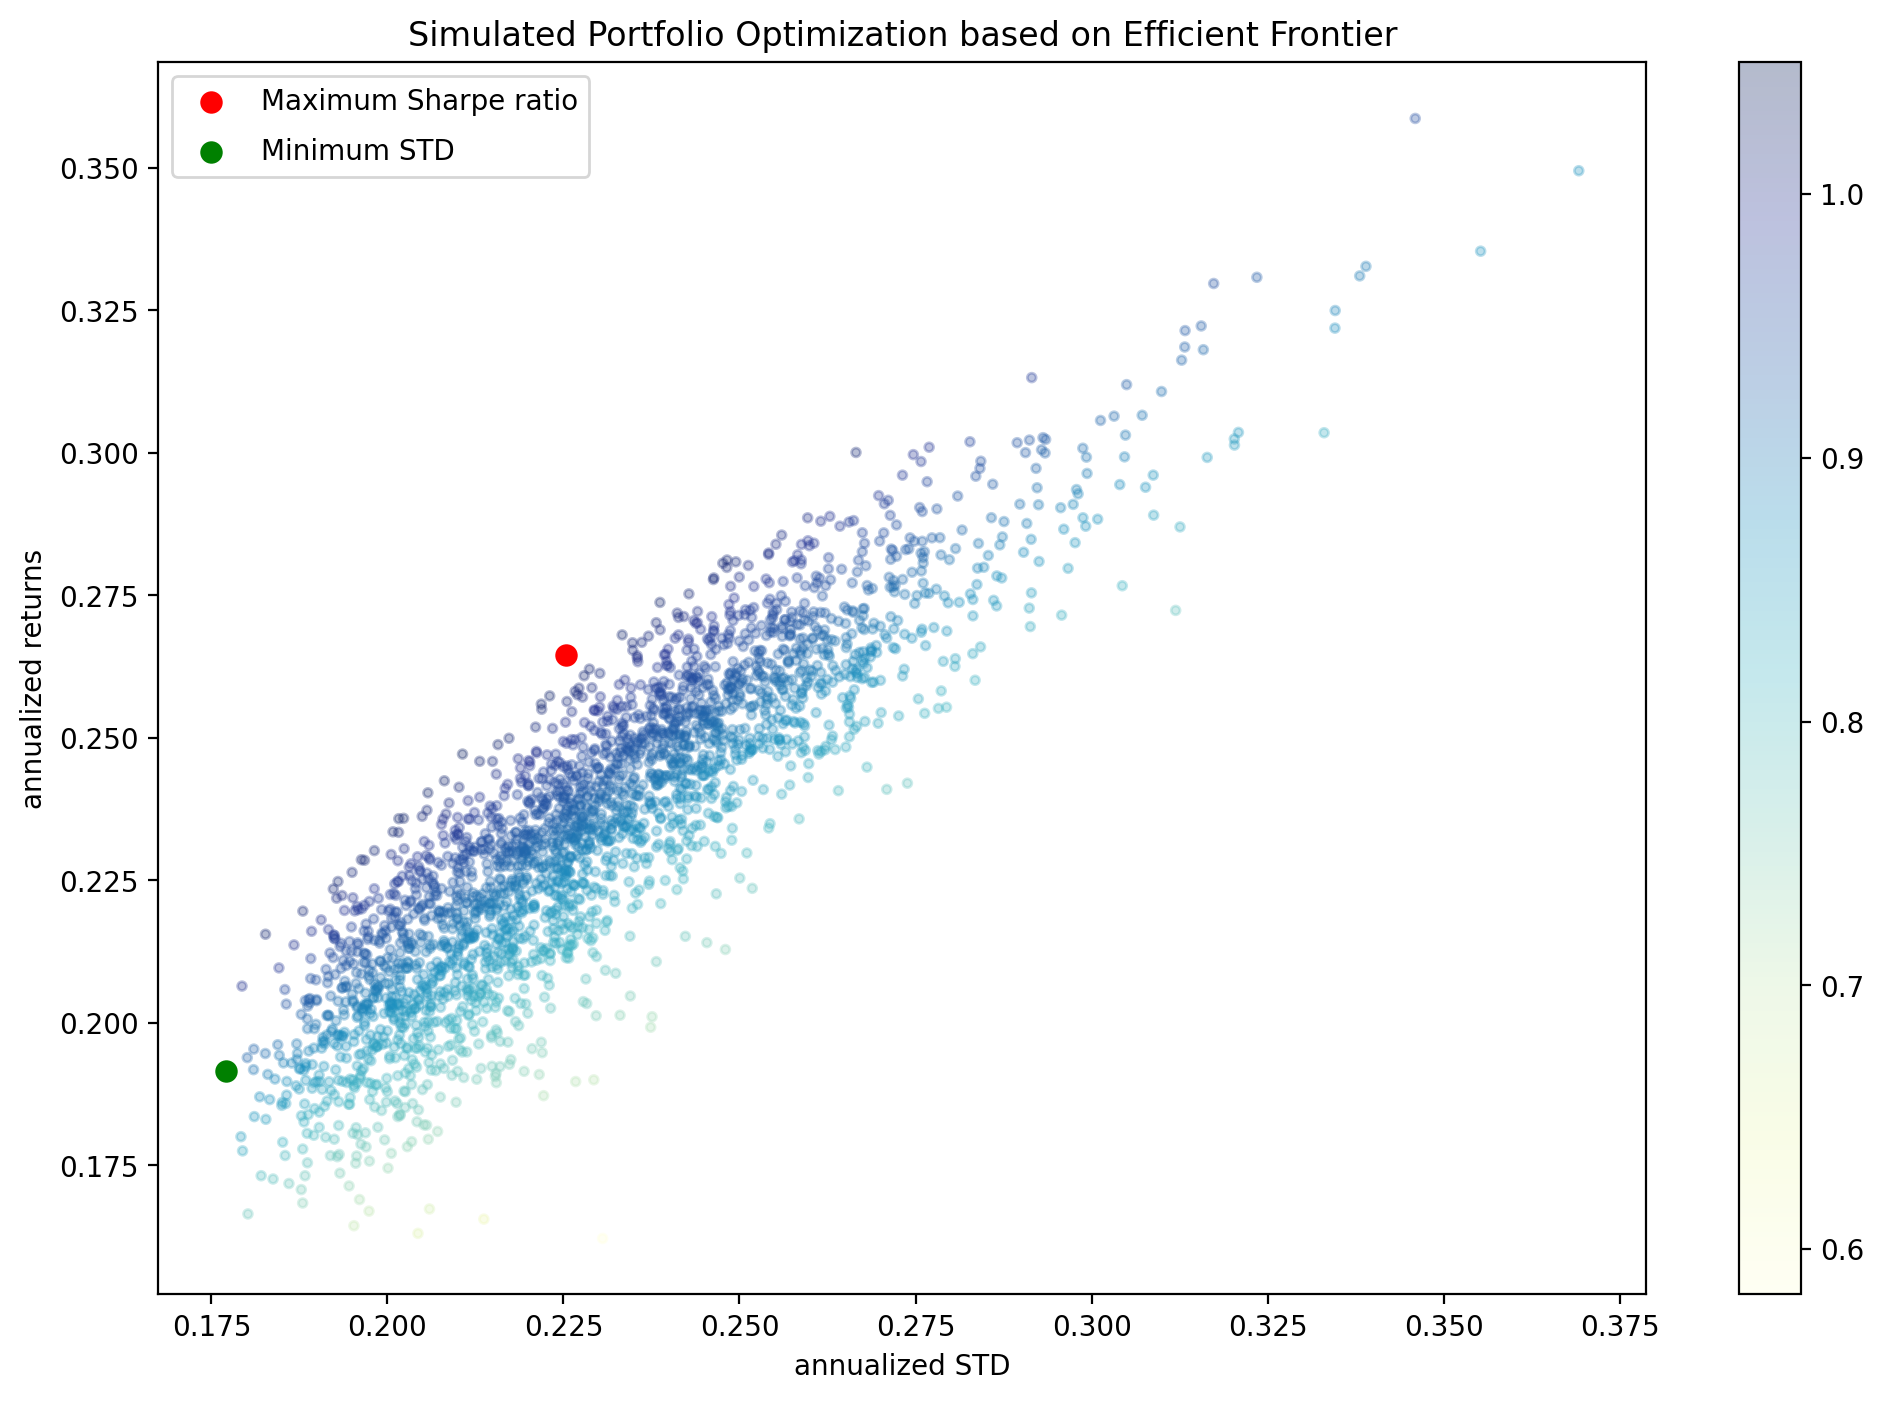

In [28]:
monthly_returns = table.resample('M').last().pct_change().dropna()

returns = monthly_returns
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)


### a.2. Efficient Portfolio, tangent

In [13]:
#Equality constraint: sum of weight =1, or np.sum(x)-1=0
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

#we want to maximize the sharpe ratio, but the minimizing routine is foe min
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints) #sequential least squares programming algorithm
    return result

In [14]:
def portfolio_std(weights, mean_returns, cov_matrix):
    return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[0]

def min_std(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [15]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_std, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [16]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualized_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_std(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualized_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp,2))
    print("Annualized STD:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print( "Minimum STD Portfolio Allocation\n")
    print("Annualized Return:", round(rp_min,2))
    print("Annualized STD:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    plt.figure(figsize=(12, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='o',color='r',s=50, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='o',color='g',s=50, label='Minimum STD')
    
    x0=[0,sdp]
    y0=[risk_free_rate, rp]
   # print("tp", sdp, rp)
    plt.plot(x0,y0)
    
    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized STD')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.25
Annualized STD: 0.21


ticker       AAPL  AMZN  BAC    CAT  GOOGL    MCD    PFE  TSLA
allocation  26.06   0.0  0.0  20.98    0.0  33.01  10.35  9.59
--------------------------------------------------------------------------------
Minimum STD Portfolio Allocation

Annualized Return: 0.17
Annualized STD: 0.16


ticker      AAPL  AMZN  BAC   CAT  GOOGL    MCD    PFE  TSLA
allocation   0.0  2.91  0.0  5.27   17.8  53.18  20.85   0.0


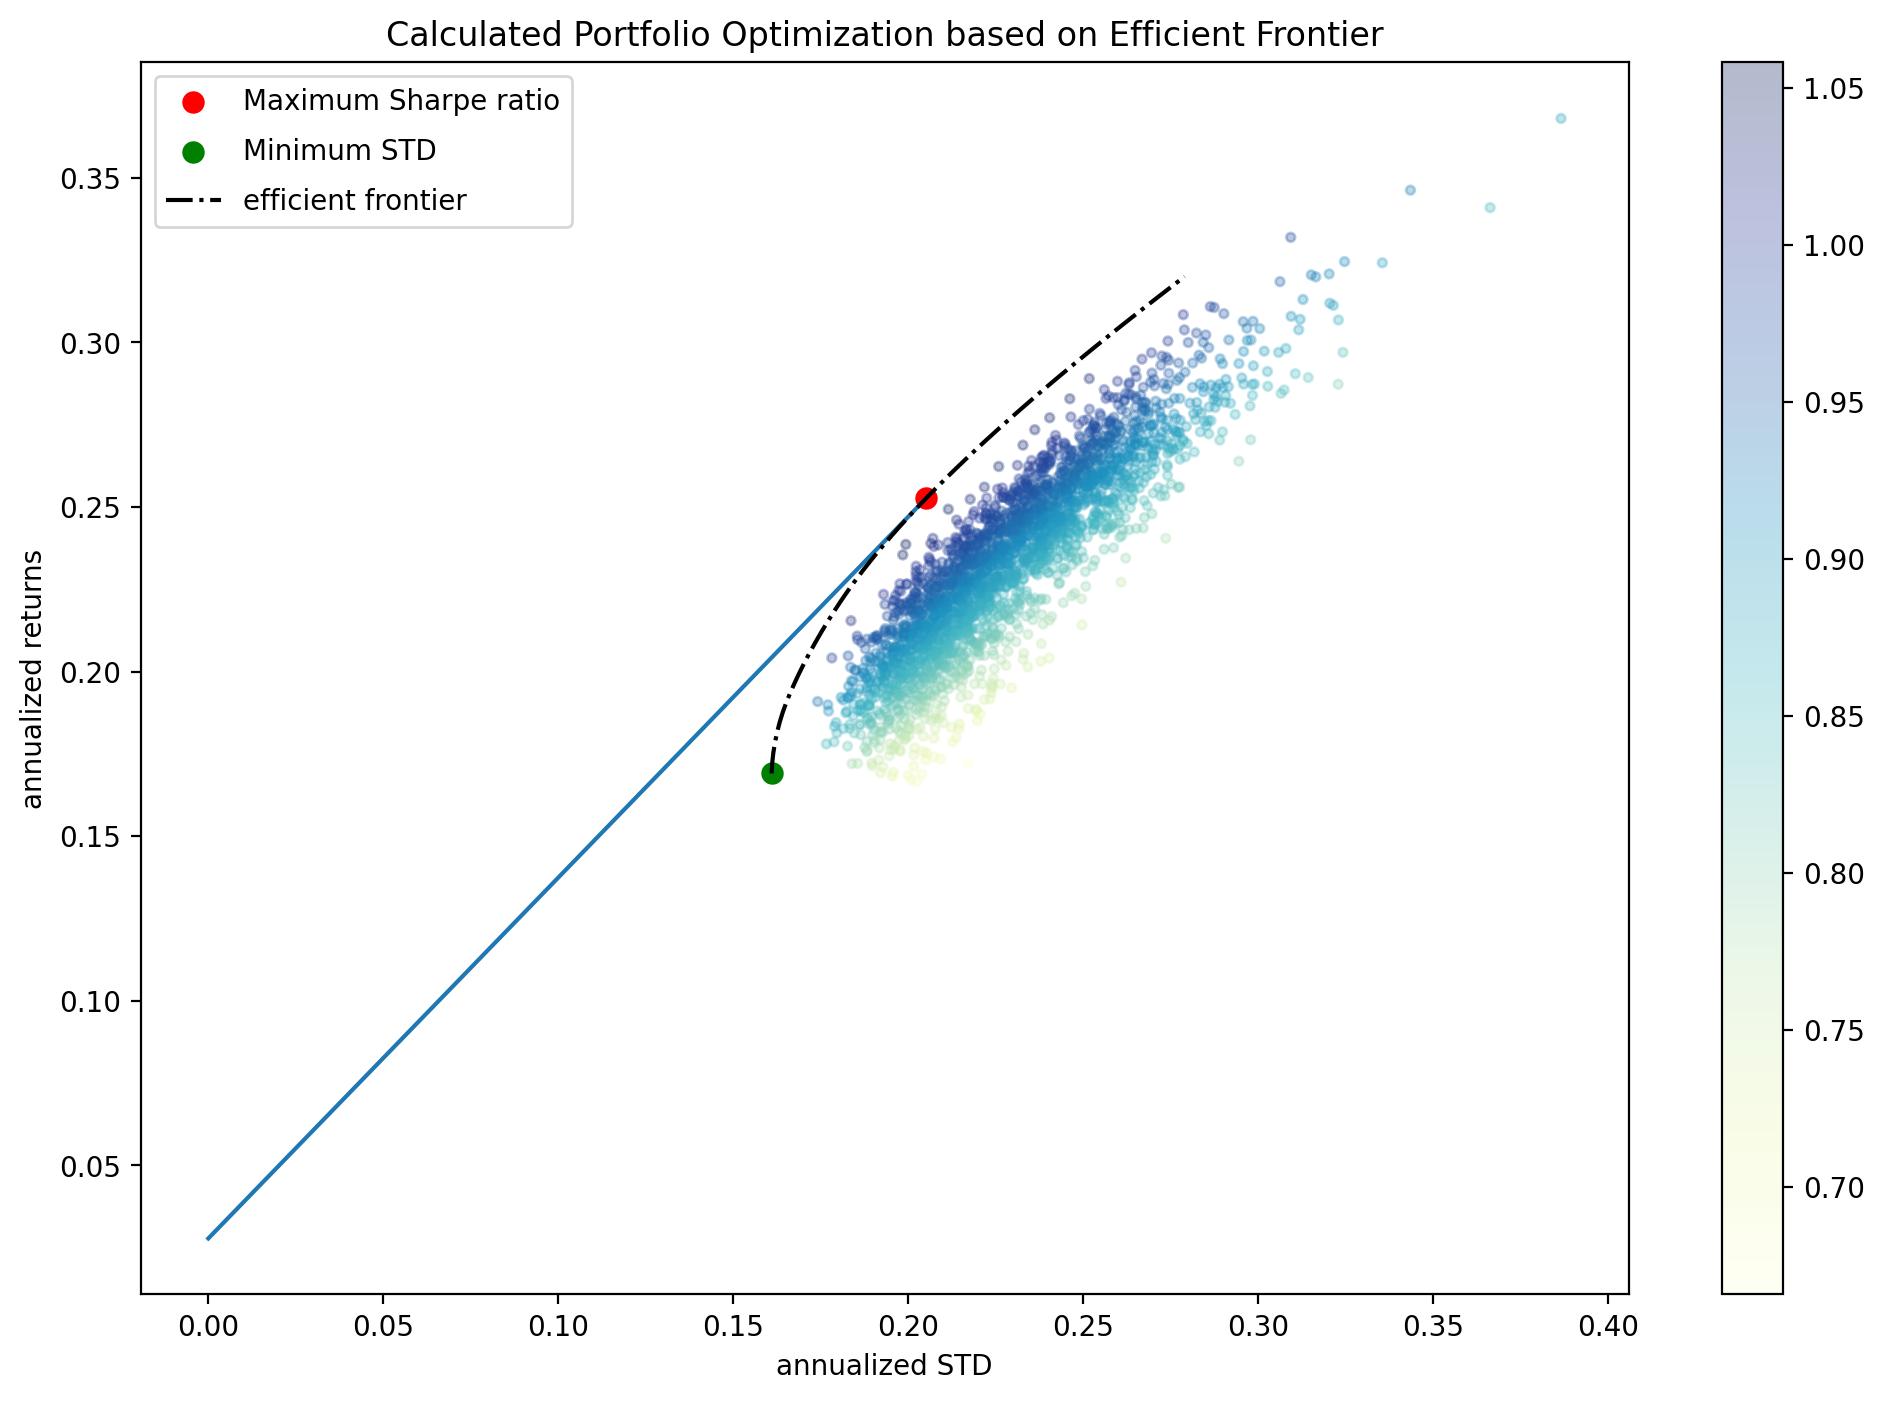

In [29]:
# display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

monthly_returns = table.resample('M').last().pct_change().dropna()

returns = monthly_returns
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

## b. Use the data from 2022, compute the mean and standard deviation of the monthly returns for the equally weighted portfolio (rebalanced at the beginning of each month).

In [18]:
# Select the data for the year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'
returns_2022 = returns.loc[start_date:end_date]

# Compute the monthly returns for each asset
monthly_returns_2022 = returns_2022.resample('M').mean()

# Compute the equally weighted portfolio returns
equally_weighted_returns_2022 = monthly_returns_2022.mean()

# Calculate the mean and standard deviation of the equally weighted portfolio returns
portfolio_mean_return = equally_weighted_returns_2022.mean()
portfolio_std_dev = equally_weighted_returns_2022.std()

# Print the results
print("Mean of equally weighted portfolio returns (2022):", portfolio_mean_return)
print("Standard deviation of equally weighted portfolio returns (2022):", portfolio_std_dev)


Mean of equally weighted portfolio returns (2022): -0.02177275044024271
Standard deviation of equally weighted portfolio returns (2022): 0.02912762191133998


In [19]:
mean_returns.round(4)

ticker
AAPL     0.0012
AMZN     0.0008
BAC      0.0006
CAT      0.0009
GOOGL    0.0007
MCD      0.0007
PFE      0.0006
TSLA     0.0022
dtype: float64

## c. Compute the mean and standard deviation for the monthly returns of the tangent portfolio.

In [20]:
# Select the data for the year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'
returns_2022 = returns.loc[start_date:end_date]

# Compute the monthly returns for each asset
monthly_returns_2022 = returns_2022.resample('M').mean()

# Calculate the mean returns and covariance matrix
mean_returns = monthly_returns_2022.mean()
cov_matrix = np.cov(monthly_returns_2022, rowvar=False)

# Define the risk-free rate
risk_free_rate = 0.02

# Define the objective function to minimize (negative Sharpe ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return -sharpe_ratio

# Define the constraints
def portfolio_constraint(weights):
    return np.sum(weights) - 1

# Define the bounds for weights (0 <= weight <= 1)
bounds = tuple((0, 1) for _ in range(len(mean_returns)))

# Perform the optimization to find the tangent portfolio
initial_weights = np.ones(len(mean_returns)) / len(mean_returns)
constraints = [{'type': 'eq', 'fun': portfolio_constraint}]
result = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate),
                  method='SLSQP', constraints=constraints, bounds=bounds)
tangent_weights = result.x

# Calculate the returns of the tangent portfolio
tangent_portfolio_returns = np.dot(monthly_returns_2022, tangent_weights)

# Calculate the mean and standard deviation of the tangent portfolio returns
tangent_portfolio_mean_return = tangent_portfolio_returns.mean()
tangent_portfolio_std_dev = tangent_portfolio_returns.std()

# Print the results
print("Mean of tangent portfolio returns (2022):", tangent_portfolio_mean_return)
print("Standard deviation of tangent portfolio returns (2022):", tangent_portfolio_std_dev)


Mean of tangent portfolio returns (2022): 0.022609059170974753
Standard deviation of tangent portfolio returns (2022): 0.13359491431122908


## d. Compare the results

In [21]:
# Mean and standard deviation of equally weighted portfolio returns
equally_weighted_mean_return = equally_weighted_returns_2022.mean()
equally_weighted_std_dev = equally_weighted_returns_2022.std()

# Print the results for equally weighted portfolio
print("Mean of equally weighted portfolio returns (2022):", equally_weighted_mean_return)
print("Standard deviation of equally weighted portfolio returns (2022):", equally_weighted_std_dev)
print()

# Mean and standard deviation of tangent portfolio returns
tangent_portfolio_mean_return = tangent_portfolio_returns.mean()
tangent_portfolio_std_dev = tangent_portfolio_returns.std()

# Print the results for tangent portfolio
print("Mean of tangent portfolio returns (2022):", tangent_portfolio_mean_return)
print("Standard deviation of tangent portfolio returns (2022):", tangent_portfolio_std_dev)


Mean of equally weighted portfolio returns (2022): -0.02177275044024271
Standard deviation of equally weighted portfolio returns (2022): 0.02912762191133998

Mean of tangent portfolio returns (2022): 0.022609059170974753
Standard deviation of tangent portfolio returns (2022): 0.13359491431122908


By comparing the mean and standard deviation values of the equally weighted portfolio and the tangent portfolio, you can assess the differences between the two approaches. The mean return indicates the average performance of the portfolio, while the standard deviation represents the volatility or risk associated with the returns.

Comparing these values will help you evaluate how the two portfolios differ in terms of their expected returns and risk levels.

Determining which portfolio is better, the equally weighted portfolio or the tangent portfolio, depends on your specific investment goals, risk tolerance, and preferences. Here are some factors to consider when evaluating the two portfolios:

1. Risk-Return Tradeoff: Compare the risk and return characteristics of both portfolios. A better portfolio would typically have a higher return with lower volatility or a higher Sharpe ratio (risk-adjusted return).

2. Diversification: Assess the level of diversification in each portfolio. A well-diversified portfolio can help mitigate risk by spreading investments across different assets or sectors.

3. Personal Preferences: Consider your personal investment preferences. Some investors may prefer a more equal distribution of weights in an equally weighted portfolio, while others may prefer a portfolio optimized for maximizing risk-adjusted returns.

4. Market Conditions: Evaluate how the portfolios have performed in different market conditions. A portfolio that performs well across various market environments may be considered more robust.

5. Constraints and Feasibility: Consider any specific constraints or practical limitations you may have, such as transaction costs, liquidity, or specific investment restrictions.

Ultimately, there is no universally "better" portfolio that applies to all investors. The choice between the equally weighted portfolio and the tangent portfolio depends on your specific circumstances and investment objectives. It's essential to carefully evaluate and compare the characteristics of each portfolio to make an informed decision that aligns with your goals and risk tolerance.

# Assignment Question #5

Implement the strategy in Question 4 dynamically. You can use a ‘rolling window’ (e.g., 2 years) to estimate the mean and variance-covariance matrix, and rebalance your portfolio monthly.
Note: This is indeed the idea used by some funds that adopt quantitative strategies.


In [22]:
#Set the rolling window size and rebalancing frequency:
rolling_window = 24  # 2 years rolling window (assuming 12 months in a year)
rebalancing_frequency = 'M'  # Monthly rebalancing

#Define the start and end dates for the rolling window and rebalancing periods:
start_date = returns.index[0]
end_date = returns.index[-1]

#Initialize empty lists to store the portfolio returns and weights over time:
portfolio_returns = []
portfolio_weights = []
#Iterate through the rolling window periods and perform the portfolio rebalancing:
current_date = start_date
while current_date + pd.DateOffset(months=rolling_window) <= end_date:
    # Select the data for the current rolling window
    window_start_date = current_date
    window_end_date = current_date + pd.DateOffset(months=rolling_window)
    window_returns = returns.loc[window_start_date:window_end_date]

    # Calculate the mean returns and covariance matrix for the current window
    mean_returns = window_returns.mean()
    cov_matrix = np.cov(window_returns, rowvar=False)

    # Define the objective function to minimize (negative Sharpe ratio)
    def negative_sharpe_ratio(weights):
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = portfolio_return / portfolio_std
        return -sharpe_ratio

    # Define the constraints
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]

    # Define the bounds for weights (0 <= weight <= 1)
    bounds = tuple((0, 1) for _ in range(len(mean_returns)))

    # Perform the optimization to find the tangent portfolio weights
    initial_weights = np.ones(len(mean_returns)) / len(mean_returns)
    result = minimize(negative_sharpe_ratio, initial_weights, method='SLSQP', constraints=constraints, bounds=bounds)
    tangent_weights = result.x

    # Store the tangent portfolio weights
    portfolio_weights.append(tangent_weights)

    # Calculate the returns of the tangent portfolio for the next rebalancing period
    rebalancing_start_date = window_end_date + pd.DateOffset(days=1)
    rebalancing_end_date = rebalancing_start_date + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    rebalancing_returns = returns.loc[rebalancing_start_date:rebalancing_end_date]
    tangent_portfolio_returns = np.dot(rebalancing_returns, tangent_weights)

    # Store the tangent portfolio returns
    portfolio_returns.append(tangent_portfolio_returns)

    # Move to the next rebalancing period
    current_date += pd.DateOffset(months=1)
#Convert the lists of portfolio returns and weights into pandas Series or DataFrame for easier analysis:
portfolio_returns = pd.Series(portfolio_returns, index=returns.index[rolling_window:])
portfolio_weights = pd.DataFrame(portfolio_weights, index=returns.index[rolling_window:], columns=returns.columns)



The strategies adjust to changing market conditions over time and reflect the idea used by some funds that adopt quantitative strategies.

Based on the performance metrics, you can assess which strategy performed better. Generally, a higher cumulative return, annualized return, and Sharpe ratio, combined with a lower standard deviation, indicate better performance. However, it's important to consider the specific goals, risk tolerance, and preferences of the investor when interpreting the results.

Remember that past performance is not indicative of future results, and it's crucial to conduct thorough analysis and consider multiple factors before making investment decisions.